### Business Case : The aim of this project is to accurately predict flight ticket prices based on features such as airline, source, destination, duration, and time of travel, helping both customers make informed decisions and airlines optimize pricing strategies.

In [2]:
# Importing libraries 

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### LOAD THE DATASET

In [4]:
data = pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### BASIC CHECKS

In [6]:
# ROWS AND COLUMNS
data.shape

(10683, 11)

In [7]:
# FIRST FIVE ROWS
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# LAST FIVE ROWS
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
# COLUMNS
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
# BASIC INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### INSIGHTS
- There are no null values in the dataset
- The price attribute is of integer type while rest of the attributes are of character type

In [12]:
# DATA TYPES
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
# VALUE COUNTS
data.value_counts()

Airline                  Date_of_Journey  Source    Destination  Route                  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info              Price
Jet Airways              27/05/2019       Delhi     Cochin       DEL → AMD → BOM → COK  19:10     19:00 28 May  23h 50m   2 stops      No info                      15129    3
                         18/05/2019       Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 19 May  22h 55m   2 stops      In-flight meal not included  13029    3
Air India                24/06/2019       Delhi     Cochin       DEL → GOI → BOM → COK  22:00     19:15 25 Jun  21h 15m   2 stops      No info                      9181     3
Jet Airways              9/05/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 10 May  22h 55m   2 stops      In-flight meal not included  13029    3
                         1/06/2019        Delhi     Cochin       DEL → JAI → BOM → COK  05:30     04:25 02 Jun  22h 55m   2 stops 

In [14]:
# STATISTICS
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### INSIGHTS
- There are no null values or missing values in the dataset
- **Average Price**: The average flight fare is approximately ₹9,087

- **Price Range**: The cheapest ticket costs ₹1,759, while the most expensive one goes up to ₹79,512.

- **Price Distribution**:

  - 25% of the tickets cost less than ₹5,277.

  - 50% of the tickets cost less than ₹8,372 (this is the median)

  - 75% of the tickets are priced below ₹12,373.

- **Skewed Prices**: Since the maximum price is very high (₹79,512) compared to the average (₹9,087), it suggests there are a few very expensive tickets pulling the average up. This indicates a right-skewed distribution.

- **Standard Deviation**: The standard deviation is ₹4,611, which means that there is significant variation in flight prices.

### EXPLORATORY DATA ANALYSIS

- **Univariate analysis**:
   - For numerical columns --> histplot/ distplot
   - For categorical/discrete column --> Countplot
- **Bivariate analyis**:
   - Between numerical and categorical column/discrete column --> Boxplot/barplot
   - Between two numerical columns --> Scatterplot/ lineplot
- **Multivariate analyis**
   - Pairplot

#### STEP 1 : UNIVARIATE ANALYSIS

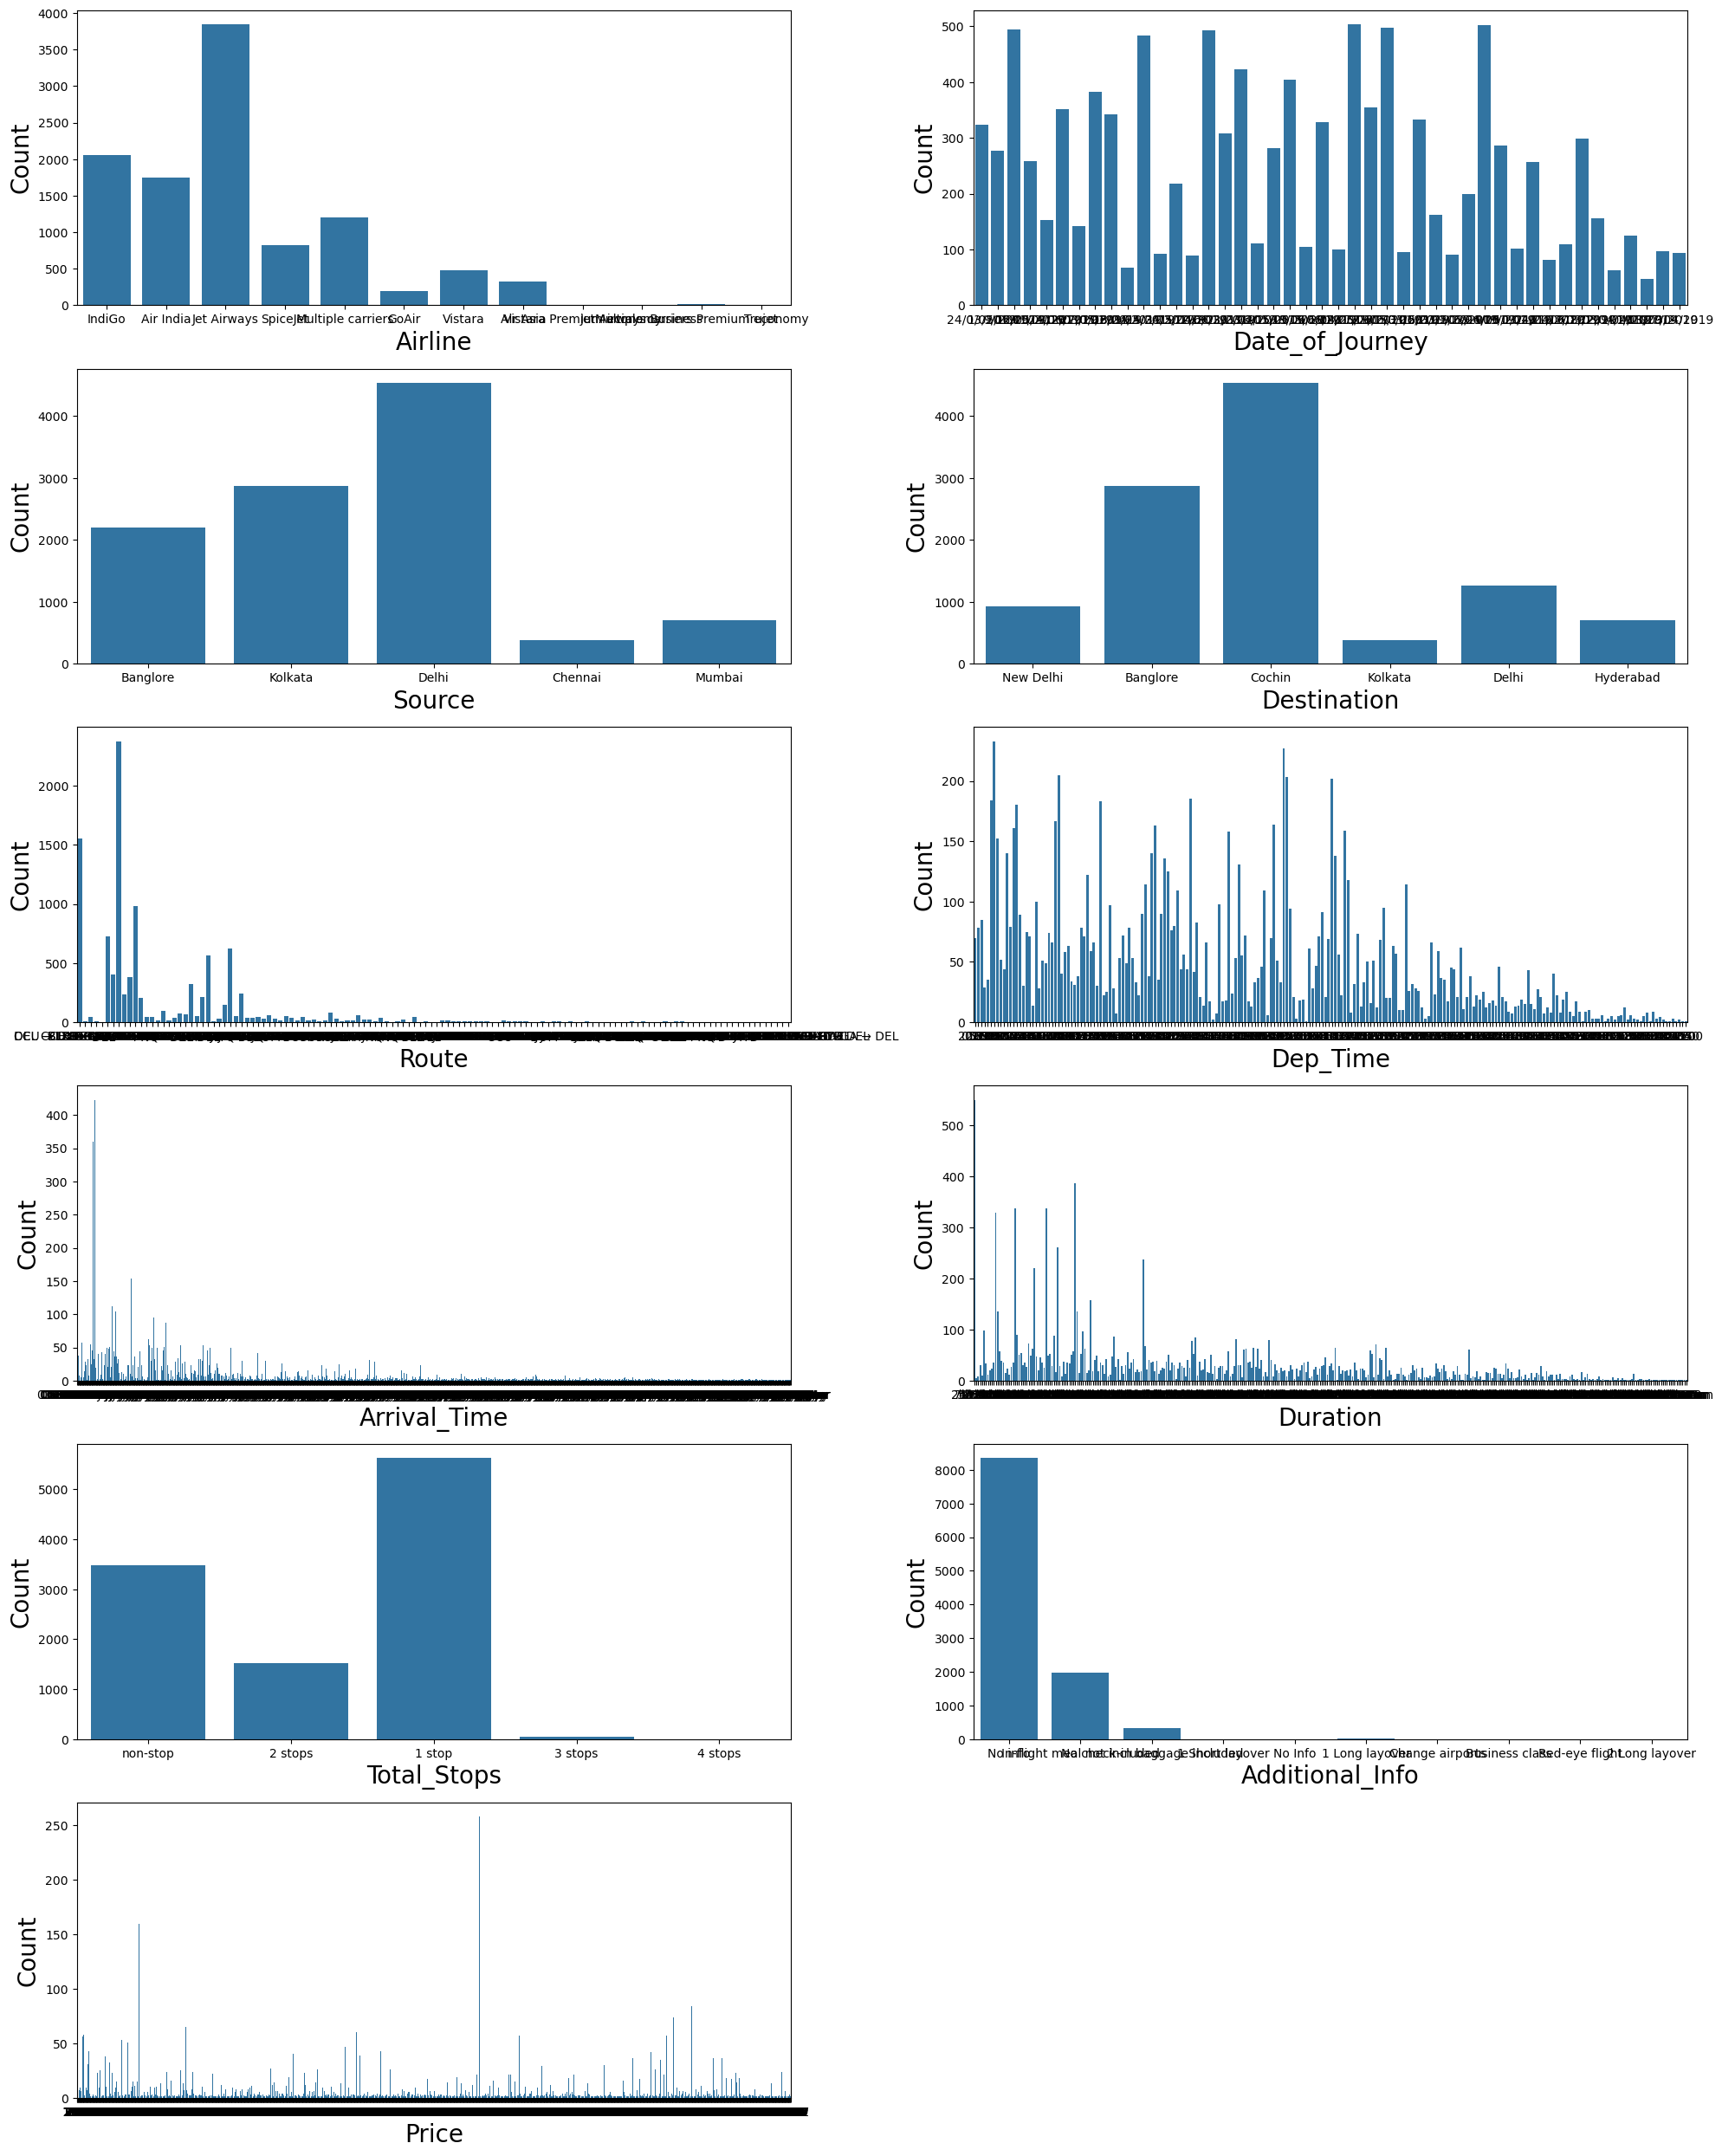

In [19]:
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
for column in data:
    if plotnumber<=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.countplot(x = data[column],ax = ax)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count', fontsize=20)
    plotnumber+=1
plt.tight_layout()

##### INSIGHTS:
- AIRLINE
  - Jet Airways, IndiGo, and Air India are the most frequently operating airlines.

  - Airlines like Vistara Premium Economy and Trujet are underrepresented, indicating limited operations or data.

- DATE OF JOURNEY
  - A wide spread of travel dates was observed.

- SOURCE AND DESTINATION
  - Delhi and Kolkata are the most common sources, while Cochin and Banglore are top destinations.

- ROUTE
  - Route data is highly varied, with a few common patterns.

  - Some routes (like DEL → BOM → BLR) are frequently traveled, while many are unique.

- ARRIVAL TIME
  - Most flights arrive during evening or night hours.

  - Very few flights reach their destination in the early morning, indicating operational preferences or customer demand patterns.

- DURATION
  - Majority of flights have durations between 3 to 5 hours, representing medium-haul trips.


- TOTAL STOPS
  - Non-stop and 1 stop flights are the most common.

  - Very few flights have 2 or more stops, which aligns with consumer preferences for shorter, more direct routes.

- ADDITIONAL INFO
  - Most flights have “No info”, meaning no special services are mentioned.

  - Some flights offer in-flight meals, business class options, or extra baggage options.

- PRICE
  - Flight prices are skewed to the right, with most fares under ₹10,000.

  - A few high-price outliers exist (up to ₹80,000+), likely due to premium services or last-minute bookings.

#### STEP 2: BIVARIATE ANALYSIS

##### CATEGORICAL DATA VS PRICE

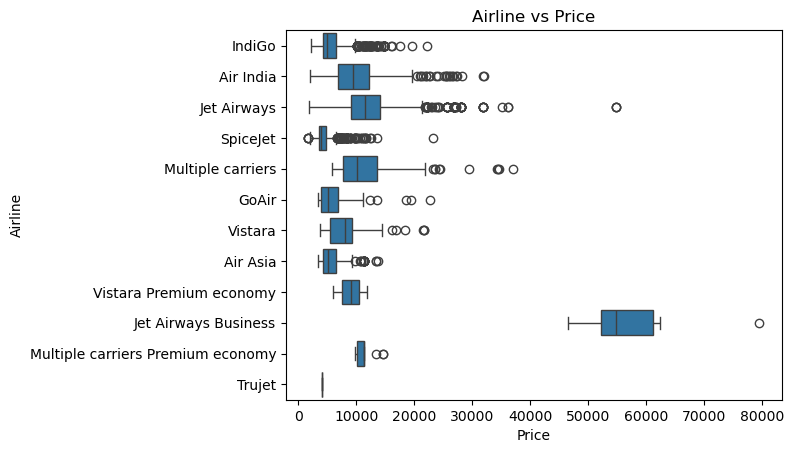

In [23]:
sns.boxplot(x='Price', y='Airline', data=data)
plt.title("Airline vs Price")
plt.show()

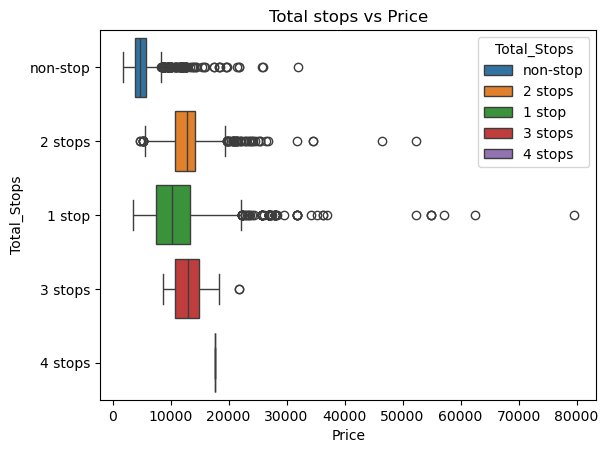

In [24]:
sns.boxplot(data = data,x = 'Price',y = 'Total_Stops',hue = 'Total_Stops')
plt.title("Total stops vs Price")
plt.show()

## INSIGHTS : 
- ### Airline vs Price
  - #### Low-cost carriers like IndiGo, SpiceJet, GoAir, Air Asia have lower average fares and less spread, indicating more consistent, budget pricing.
  - #### Premium options like Jet Airways Business, Vistara Premium Economy, and Multiple carriers Premium economy are significantly more expensive
  - #### Multiple carriers show high variability, suggesting combinations of airlines and class upgrades affect pricing.


- ### Total Stops vs Price
  - #### Non-stop flights have the lowest fare variability and are generally cheaper.
  - #### 1-stop flights show a wider spread in prices, with some higher fare outliers.
  - #### 2 stops and 3 stops also show significant price ranges, sometimes higher than 1-stop, likely due to indirect routes.
  - #### 4 stops have very limited data but seem to have lower to mid-range prices, possibly due to low demand or budget carriers.
  - #### There is no direct linear relationship — more stops do not always mean lower prices.

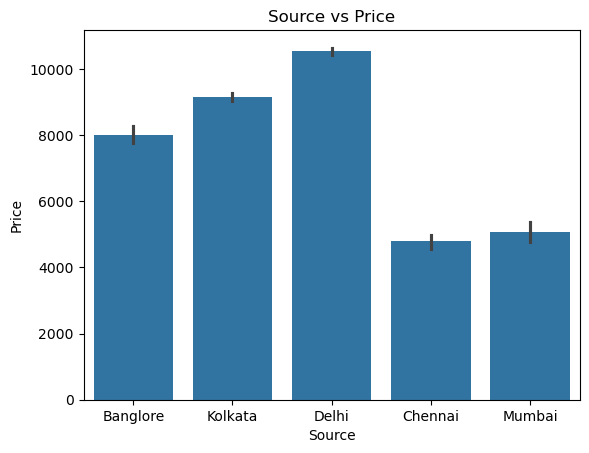

In [26]:
sns.barplot(data = data,x = 'Source',y = 'Price')
plt.title("Source vs Price")
plt.show()

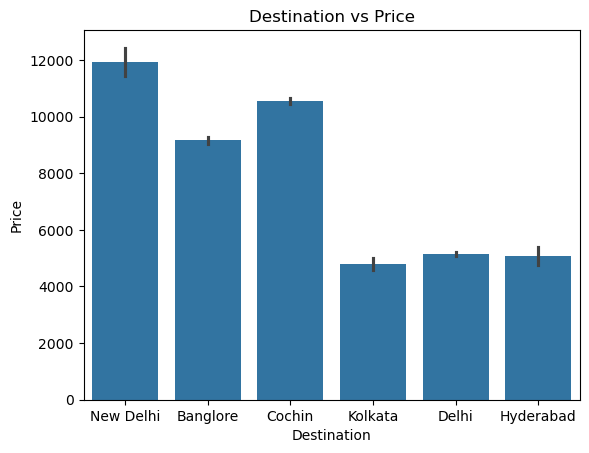

In [27]:
sns.barplot(data = data,x = 'Destination',y = 'Price')
plt.title("Destination vs Price")
plt.show()

##### INSIGHTS:
- AIRLINE VS PRICE (Boxplot)
  - Jet Airways Business has the highest median price, with many high-value outliers – clearly a premium service.

  - Air India, Jet Airways, and Vistara also have relatively high prices, indicating they offer more premium features.

  - IndiGo, SpiceJet, and GoAir show lower median prices and tighter price ranges, suggesting they are budget airlines.

- TOTAL STOPS VS PRICE (Boxplot)
  - A clear positive correlation is observed: more stops → higher price.

  - Non-stop flights are typically cheaper.

  - 1 stop flights show higher price variability, possibly due to differences in layover duration, airline, or route.

  - 2 or more stops  have higher average prices, but also may include business class or less frequent routes.
- SOURCE VS PRICE (Barplot)
  - Delhi and Chennai show higher average flight prices.

  - Kolkata has the lowest average price among the major sources.

  - Banglore and Mumbai lie somewhere in the middle.


##### PREPROCESSING DATE/TIME AND DURATION COLUMNS

<Axes: xlabel='Price'>

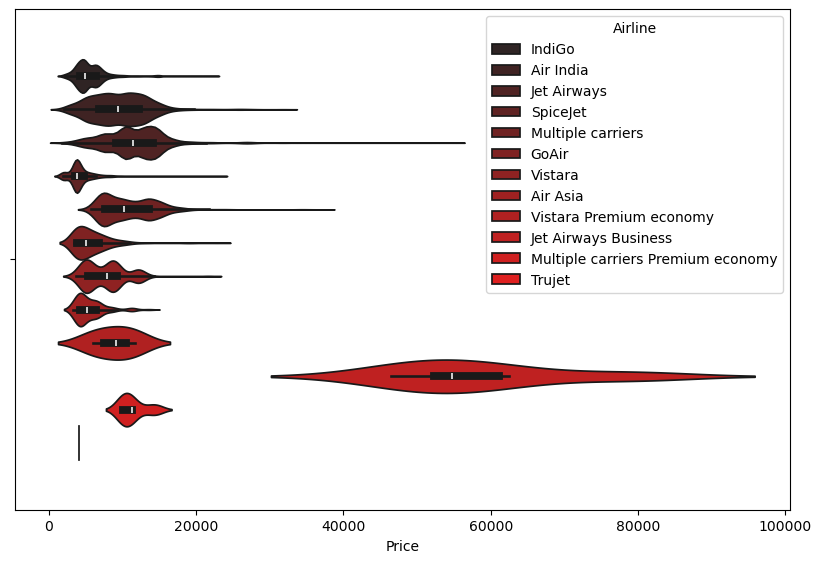

In [30]:
plt.figure(figsize = (10,6.5), facecolor = 'white')
sns.violinplot(data = data , x = 'Price',hue = 'Airline',color = 'red')

- # INSIGHTS :
- The chart clearly differentiates between budget and premium flight options.
- Trujet has the highest and widest price range.
- IndiGo, SpiceJet, GoAir, and Air Asia offer the lowest prices.
- Most airlines' prices are concentrated below 20,000.
- Jet Airways Business, Vistara Premium economy are in the higher price brackets.

In [32]:
# Convert Date_of_Journey
data['Journey_Day'] = pd.to_datetime(data['Date_of_Journey']).dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey']).dt.month

# Convert Dep_Time and Arrival_Time
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute'] = pd.to_datetime(data['Dep_Time']).dt.minute
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute

# Convert Duration to hours and minutes
data['Duration'] = data['Duration'].str.replace('h', '').str.replace('m', '').str.replace(' ', '')
data['Duration'] = data['Duration'].apply(lambda x: '0' + x if 'm' in x and x.startswith('m') else x)
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x.split('m')[0]) if 'm' in x else int(x))


##### NUMERICAL VS PRICE

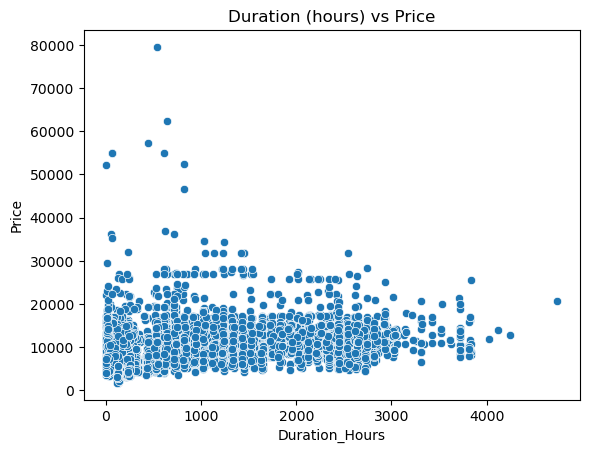

In [34]:
sns.scatterplot(x='Duration_Hours', y='Price', data=data)
plt.title("Duration (hours) vs Price")
plt.show()

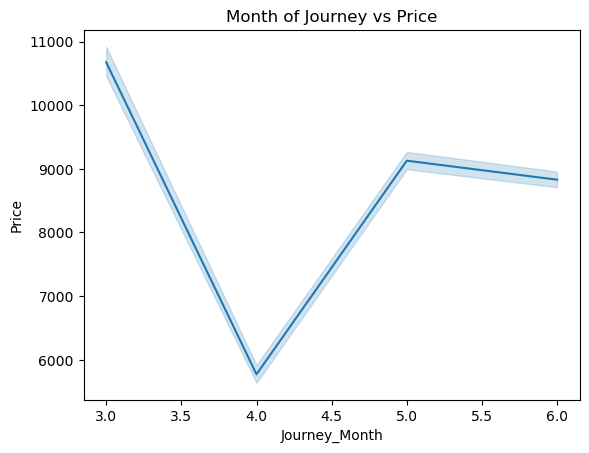

In [35]:
sns.lineplot(x='Journey_Month', y='Price', data=data)
plt.title("Month of Journey vs Price")
plt.show()

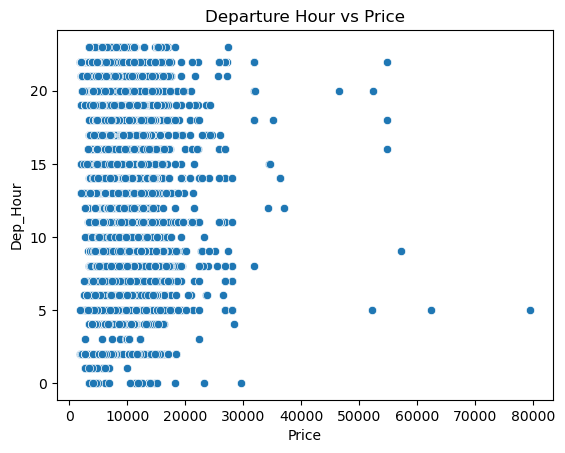

In [36]:
sns.scatterplot(x='Price', y='Dep_Hour', data=data)
plt.title("Departure Hour vs Price")
plt.show()

##### INSIGHTS:
- DURATION(HOURS) VS PRICE (Scatterplot)
  - There's a general upward trend: as flight duration increases, price also increases.

  - However, the relationship is not strictly linear :

     - Short flights (<2 hrs) with low prices.

     - Duration flights (2–5 hrs) with a wider spread in prices.

     - Long-duration flights (>10 hrs) often have high prices, potentially due to international or multi-stop flights.

- Outliers are present, where some long flights have low prices — possibly due to budget airlines or discounted fares.

  
- JOURNEY DAY VS PRICE (Lineplot)
   - No strong linear relationship, but some price spikes around specific days.

   - Certain days (e.g., Day 1, 15, 30) may show higher prices, potentially due to:

      - Start/end of the month

      - Holiday rush or salary periods

   - Mid-month days may be slightly more stable in pricing.

 
- JOURNEY MONTH VS PRICE (Lineplot)
  - Prices tend to be higher in peak travel months:

    - E.g., May and June (summer vacation season) show visible price increases.

  - March or November might also have spikes (festivals, exams, etc.)

  - Lower prices are seen in off-peak months like February or April.

#### STEP 3: MULTIVARIATE ANALYSIS


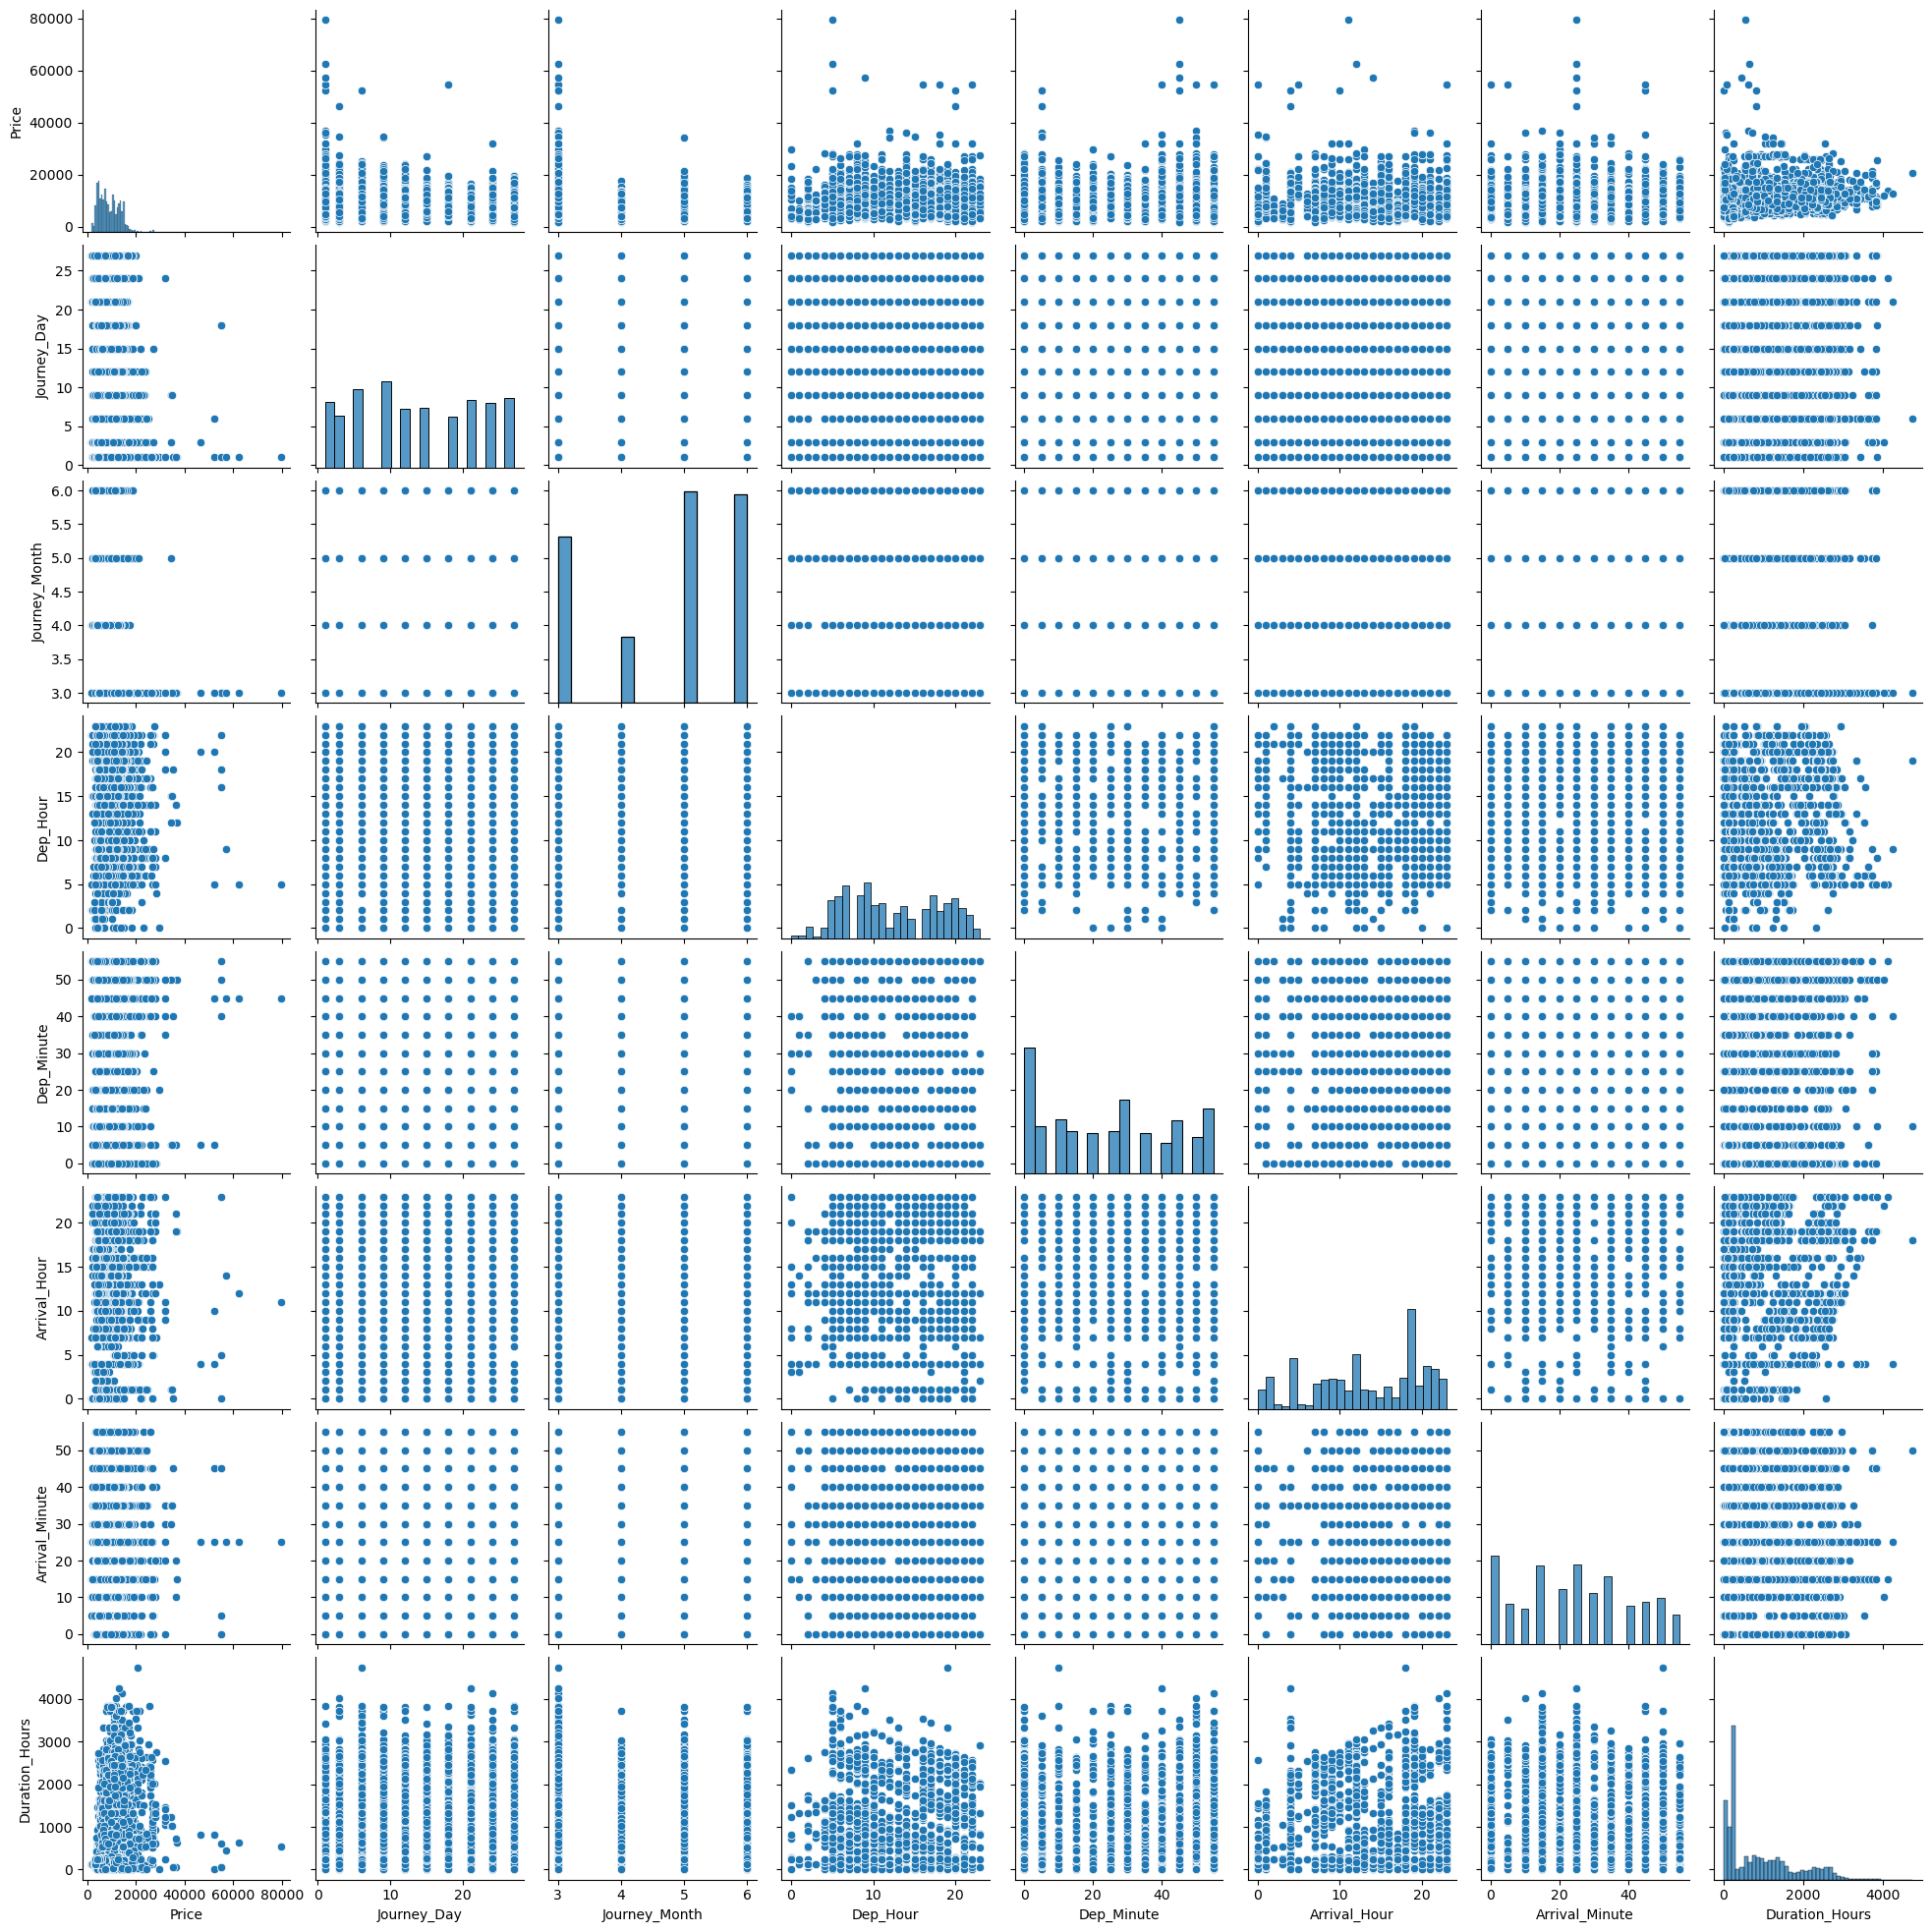

In [39]:
features = ['Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
            'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours']
sns.pairplot(data[features])
plt.show()

##### INSIGHTS:

####  Multivariate Analysis – Pairplot Insights

####  1. Price Correlation with Other Features

- **Price vs Duration_Hours**: Shows a **positive correlation** – longer flights tend to be more expensive.
- **Price vs Dep_Hour / Arrival_Hour**: No strong linear trend, but some clustering around **peak travel hours** (e.g., early morning and evening).
- **Price vs Journey_Month**: Mild seasonal effect – some months have noticeably higher prices.

---

####  2. Duration_Hours as a Key Feature

- Strong correlation with `Dep_Hour` and `Arrival_Hour`: 
  - Early morning flights tend to be shorter (possibly non-stop).
  - Late-night flights may have longer durations (possibly layovers).
- `Dep_Minute` and `Arrival_Minute` show **little to no influence** on duration or price.



# TASK 1 - Complete data analysis report

# Duration impact Pricing
- ### Flight Duration is the Strongest Predictor of Price
- ### Correlation with Price: ~0.75 (strong positive)
- ### Average price for:
- ### Flights < 2 hours: ₹3,200
- ### Flights > 5 hours: ₹7,500+

 ## Interpretation: Longer flight durations (often with layovers) lead to significantly higher ticket prices.

# Seasonal Trends Impact Pricing
- ### Journey_Month shows a moderate correlation (~0.35) with Price.
- ### Average prices:
- ### May: ₹7,100 (peak holiday season)
- ### January: ₹5,400 (low season)
- ### Suggests pricing is affected by travel demand cycles, such as summer holidays and festivals.

# Departure and Arrival Hours Show Price Clusters

- ### No linear correlation (r < 0.2), but clustering around peak hours:
- ### Flights departing between 6–10 AM or 6–10 PM are more expensive on average.
- ### These time slots align with business and convenient travel windows.
- ### Example: Average price for 7 AM flights is ₹6,800 vs ₹5,000 for mid-day flights.

# Journey Day Has Minimal Influence

- ### Journey_Day has very low correlation (< 0.1) with Price.
- ### No consistent trend across 1st to 31st of the month.
- ### Interpretation: Ticket pricing doesn't vary significantly across different days of the month

### DATA PREPROCESSING

##### Check for null values

In [46]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Minute         0
Arrival_Hour       0
Arrival_Minute     0
Duration_Hours     0
dtype: int64

In [47]:
columns = data.columns
columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours'],
      dtype='object')

In [48]:
cols = ['Route','Total_Stops']
for cols in data:
    if data[cols].dtype == 'object':
        data[cols].fillna(data[cols].mode()[0],inplace = True)
    else:
        data[cols].fillna(data[cols].median,inplace = True)

In [49]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Minute         0
Arrival_Hour       0
Arrival_Minute     0
Duration_Hours     0
dtype: int64

##### Check for duplicates

In [51]:
data.duplicated().sum()

220

In [52]:
data.drop_duplicates(inplace = True)

In [53]:
data.duplicated().sum()

0

##### Check for outliers

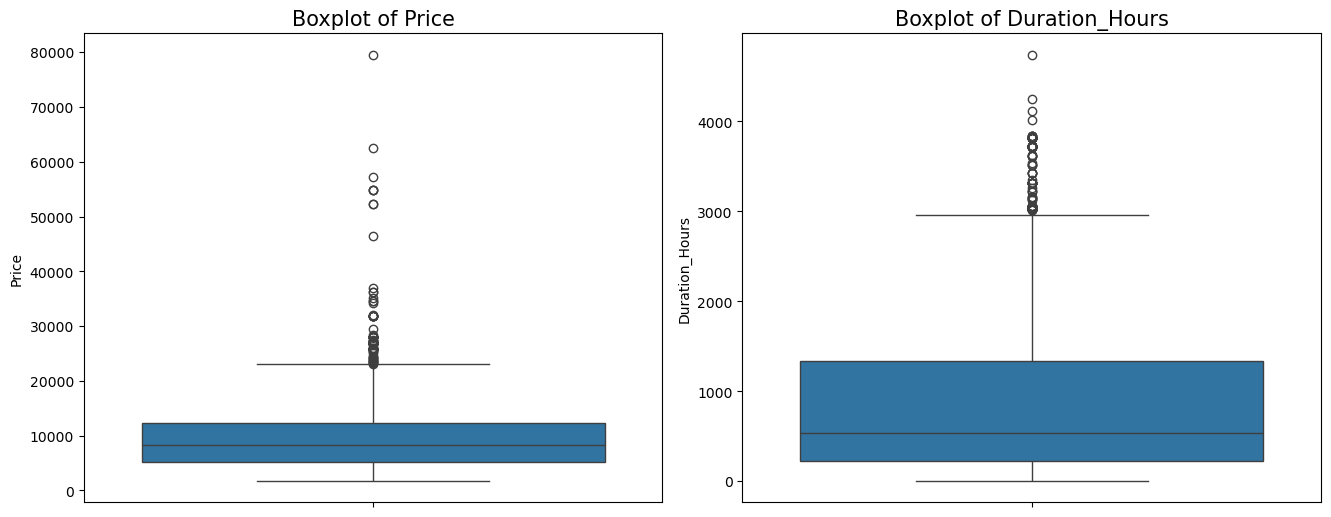

In [55]:
numerical_cols = data.select_dtypes(include = ['int64','float64']).columns
plt.figure(figsize = (20,15))
plotnumber = 1
for column in numerical_cols:
    if plotnumber<=len(numerical_cols):
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(y = data[column],ax = ax)
        plt.title(f'Boxplot of {column}',fontsize = 15)
    plotnumber+=1
plt.tight_layout()
plt.show()

##### Handling Outliers

In [57]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [58]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,250,non-stop,No info,3897,24,3,22,20,1,10,250
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,725,2 stops,No info,7662,1,5,5,50,13,15,725
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13882,9,6,9,25,4,25,19
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,525,1 stop,No info,6218,12,5,18,5,23,30,525
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,445,1 stop,No info,13302,1,3,16,50,21,35,445


In [59]:
data1 = data.copy()

In [60]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,250,non-stop,No info,3897,24,3,22,20,1,10,250
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,725,2 stops,No info,7662,1,5,5,50,13,15,725
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13882,9,6,9,25,4,25,19
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,525,1 stop,No info,6218,12,5,18,5,23,30,525
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,445,1 stop,No info,13302,1,3,16,50,21,35,445


In [61]:
data1.drop(['Duration_Hours'], axis=1, inplace=True)

In [62]:
data1.drop(['Dep_Hour','Arrival_Hour','Dep_Minute','Arrival_Minute'], axis=1, inplace=True)

In [63]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,250,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,725,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,525,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,445,1 stop,No info,13302,1,3


In [64]:

data1= pd.DataFrame(data1)

# Split Route into multiple columns
route_split = data1['Route'].str.split(' → ', expand=True)

# Rename columns
route_split.columns = [f'Route_{i+1}' for i in range(route_split.shape[1])]

# Merge with original dataframe if needed
data1 = data1.drop(columns='Route').join(route_split)

In [65]:
data1

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,250,non-stop,No info,3897,24,3,BLR,DEL,None,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,725,2 stops,No info,7662,1,5,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19,2 stops,No info,13882,9,6,DEL,LKO,BOM,COK,None,None
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,525,1 stop,No info,6218,12,5,CCU,NAG,BLR,None,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,445,1 stop,No info,13302,1,3,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,230,non-stop,No info,4107,9,4,CCU,BLR,None,None,None,None
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,235,non-stop,No info,4145,27,4,CCU,BLR,None,None,None,None
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3,non-stop,No info,7229,27,4,BLR,DEL,None,None,None,None
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,240,non-stop,No info,12648,1,3,BLR,DEL,None,None,None,None


In [66]:
data1.drop(['Route_5','Route_6'], axis=1, inplace=True)

In [67]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,250,non-stop,No info,3897,24,3,BLR,DEL,None,None
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,725,2 stops,No info,7662,1,5,CCU,IXR,BBI,BLR
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19,2 stops,No info,13882,9,6,DEL,LKO,BOM,COK
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,525,1 stop,No info,6218,12,5,CCU,NAG,BLR,None
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,445,1 stop,No info,13302,1,3,BLR,NAG,DEL,None


In [68]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Dep_Hour            int32
Dep_Minute          int32
Arrival_Hour        int32
Arrival_Minute      int32
Duration_Hours      int64
dtype: object

In [69]:
data1 = pd.DataFrame(data1)

# Extract time (HH:MM)
data1['Arrival_HourMin'] = data1['Arrival_Time'].str.extract(r'(^\d{2}:\d{2})')

# Extract month (if exists)
data1['Arrival_Month'] = data1['Arrival_Time'].str.extract(r'\d{2}\s([A-Za-z]{3})')



In [70]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Arrival_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,250,non-stop,No info,3897,24,3,BLR,DEL,None,None,01:10,Mar
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,725,2 stops,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19,2 stops,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,525,1 stop,No info,6218,12,5,CCU,NAG,BLR,None,23:30,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,445,1 stop,No info,13302,1,3,BLR,NAG,DEL,None,21:35,NaN


In [71]:
data1.drop(['Date_of_Journey','Arrival_Month'], axis=1, inplace=True)

In [72]:
data1.drop(['Arrival_Time'], axis =1, inplace=True)

In [73]:
data1.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin
0,IndiGo,Banglore,New Delhi,22:20,250,non-stop,No info,3897,24,3,BLR,DEL,None,None,01:10
1,Air India,Kolkata,Banglore,05:50,725,2 stops,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15
2,Jet Airways,Delhi,Cochin,09:25,19,2 stops,No info,13882,9,6,DEL,LKO,BOM,COK,04:25
3,IndiGo,Kolkata,Banglore,18:05,525,1 stop,No info,6218,12,5,CCU,NAG,BLR,None,23:30
4,IndiGo,Banglore,New Delhi,16:50,445,1 stop,No info,13302,1,3,BLR,NAG,DEL,None,21:35


In [74]:
data1['Total_Stops'].fillna(data1['Total_Stops'].mode()[0], inplace=True)

In [75]:
data1['Num_Stops'] = data1['Total_Stops'].apply(lambda x: 0 if x == 'non-stop' else int(x.split()[0]))

In [76]:
data1.isnull().sum()

Airline               0
Source                0
Destination           0
Dep_Time              0
Duration              0
Total_Stops           0
Additional_Info       0
Price                 0
Journey_Day           0
Journey_Month         0
Route_1               0
Route_2               0
Route_3            3472
Route_4            9023
Arrival_HourMin       0
Num_Stops             0
dtype: int64

In [77]:
data1.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops
0,IndiGo,Banglore,New Delhi,22:20,250,non-stop,No info,3897,24,3,BLR,DEL,None,None,01:10,0
1,Air India,Kolkata,Banglore,05:50,725,2 stops,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2
2,Jet Airways,Delhi,Cochin,09:25,19,2 stops,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2
3,IndiGo,Kolkata,Banglore,18:05,525,1 stop,No info,6218,12,5,CCU,NAG,BLR,None,23:30,1
4,IndiGo,Banglore,New Delhi,16:50,445,1 stop,No info,13302,1,3,BLR,NAG,DEL,None,21:35,1


In [78]:
data1.drop(['Total_Stops'], axis =1, inplace=True)

In [79]:
data1.head()

,Airline,Source,Destination,Dep_Time,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops
0,IndiGo,Banglore,New Delhi,22:20,250,No info,3897,24,3,BLR,DEL,None,None,01:10,0
1,Air India,Kolkata,Banglore,05:50,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2
2,Jet Airways,Delhi,Cochin,09:25,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2
3,IndiGo,Kolkata,Banglore,18:05,525,No info,6218,12,5,CCU,NAG,BLR,None,23:30,1
4,IndiGo,Banglore,New Delhi,16:50,445,No info,13302,1,3,BLR,NAG,DEL,None,21:35,1


In [80]:
data1['Route_3'].isnull()

0         True
1        False
2        False
3        False
4        False
         ...  
10678     True
10679     True
10680     True
10681     True
10682    False
Name: Route_3, Length: 10250, dtype: bool

In [81]:
data1['Route_3'] = data1['Route_3'].fillna('0')
data1['Route_4'] = data1['Route_4'].fillna('0')


In [82]:
data1.head()

,Airline,Source,Destination,Dep_Time,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops
0,IndiGo,Banglore,New Delhi,22:20,250,No info,3897,24,3,BLR,DEL,0,0,01:10,0
1,Air India,Kolkata,Banglore,05:50,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2
2,Jet Airways,Delhi,Cochin,09:25,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2
3,IndiGo,Kolkata,Banglore,18:05,525,No info,6218,12,5,CCU,NAG,BLR,0,23:30,1
4,IndiGo,Banglore,New Delhi,16:50,445,No info,13302,1,3,BLR,NAG,DEL,0,21:35,1


In [83]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         7999
In-flight meal not included     1914
No check-in baggage included     318
1 Long layover                     9
Change airports                    6
No Info                            3
Red-eye flight                     1
Name: count, dtype: int64

In [84]:
# Replace 'No Info' with 'No info' in the 'Additional_Info' column
data1['Additional_Info'] = data1['Additional_Info'].replace('No Info', 'No info')

# Display the updated value counts for verification
# (data1['Additional_Info'].value_counts().to_markdown(numalign="left", stralign="left"))

In [85]:
data1.head()

,Airline,Source,Destination,Dep_Time,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops
0,IndiGo,Banglore,New Delhi,22:20,250,No info,3897,24,3,BLR,DEL,0,0,01:10,0
1,Air India,Kolkata,Banglore,05:50,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2
2,Jet Airways,Delhi,Cochin,09:25,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2
3,IndiGo,Kolkata,Banglore,18:05,525,No info,6218,12,5,CCU,NAG,BLR,0,23:30,1
4,IndiGo,Banglore,New Delhi,16:50,445,No info,13302,1,3,BLR,NAG,DEL,0,21:35,1


In [86]:
data1.head()

,Airline,Source,Destination,Dep_Time,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops
0,IndiGo,Banglore,New Delhi,22:20,250,No info,3897,24,3,BLR,DEL,0,0,01:10,0
1,Air India,Kolkata,Banglore,05:50,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2
2,Jet Airways,Delhi,Cochin,09:25,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2
3,IndiGo,Kolkata,Banglore,18:05,525,No info,6218,12,5,CCU,NAG,BLR,0,23:30,1
4,IndiGo,Banglore,New Delhi,16:50,445,No info,13302,1,3,BLR,NAG,DEL,0,21:35,1


In [87]:
data1['Additional_Info'].value_counts()

Additional_Info
No info                         8002
In-flight meal not included     1914
No check-in baggage included     318
1 Long layover                     9
Change airports                    6
Red-eye flight                     1
Name: count, dtype: int64

In [88]:
data1[['hours','minutes']]=data1['Dep_Time'].str.split(':',expand=True)
data1

,Airline,Source,Destination,Dep_Time,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops,hours,minutes
0,IndiGo,Banglore,New Delhi,22:20,250,No info,3897,24,3,BLR,DEL,0,0,01:10,0,22,20
1,Air India,Kolkata,Banglore,05:50,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2,05,50
2,Jet Airways,Delhi,Cochin,09:25,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2,09,25
3,IndiGo,Kolkata,Banglore,18:05,525,No info,6218,12,5,CCU,NAG,BLR,0,23:30,1,18,05
4,IndiGo,Banglore,New Delhi,16:50,445,No info,13302,1,3,BLR,NAG,DEL,0,21:35,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,230,No info,4107,9,4,CCU,BLR,0,0,22:25,0,19,55
10679,Air India,Kolkata,Banglore,20:45,235,No info,4145,27,4,CCU,BLR,0,0,23:20,0,20,45
10680,Jet Airways,Banglore,Delhi,08:20,3,No info,7229,27,4,BLR,DEL,0,0,11:20,0,08,20
10681,Vistara,Banglore,New Delhi,11:30,240,No info,12648,1,3,BLR,DEL,0,0,14:10,0,11,30


In [89]:
data1.drop(['Dep_Time'], axis =1, inplace=True)

In [90]:
data1.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops,hours,minutes
0,IndiGo,Banglore,New Delhi,250,No info,3897,24,3,BLR,DEL,0,0,01:10,0,22,20
1,Air India,Kolkata,Banglore,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2,05,50
2,Jet Airways,Delhi,Cochin,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2,09,25
3,IndiGo,Kolkata,Banglore,525,No info,6218,12,5,CCU,NAG,BLR,0,23:30,1,18,05
4,IndiGo,Banglore,New Delhi,445,No info,13302,1,3,BLR,NAG,DEL,0,21:35,1,16,50


In [91]:
data1.rename(columns={'hours': 'Dep_hour'}, inplace=True)

In [92]:
data1.rename(columns={'minutes': 'Dep_minutes'}, inplace=True)

In [93]:
data1[['hours','minutes']]=data1['Arrival_HourMin'].str.split(':',expand=True)
data1

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Arrival_HourMin,Num_Stops,Dep_hour,Dep_minutes,hours,minutes
0,IndiGo,Banglore,New Delhi,250,No info,3897,24,3,BLR,DEL,0,0,01:10,0,22,20,01,10
1,Air India,Kolkata,Banglore,725,No info,7662,1,5,CCU,IXR,BBI,BLR,13:15,2,05,50,13,15
2,Jet Airways,Delhi,Cochin,19,No info,13882,9,6,DEL,LKO,BOM,COK,04:25,2,09,25,04,25
3,IndiGo,Kolkata,Banglore,525,No info,6218,12,5,CCU,NAG,BLR,0,23:30,1,18,05,23,30
4,IndiGo,Banglore,New Delhi,445,No info,13302,1,3,BLR,NAG,DEL,0,21:35,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,230,No info,4107,9,4,CCU,BLR,0,0,22:25,0,19,55,22,25
10679,Air India,Kolkata,Banglore,235,No info,4145,27,4,CCU,BLR,0,0,23:20,0,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3,No info,7229,27,4,BLR,DEL,0,0,11:20,0,08,20,11,20
10681,Vistara,Banglore,New Delhi,240,No info,12648,1,3,BLR,DEL,0,0,14:10,0,11,30,14,10


In [94]:
data1.rename(columns={'hours': 'Arrival_hour'}, inplace=True)

In [95]:
data1.rename(columns={'minutes': 'Arrival_minutes'}, inplace=True)

In [96]:
data1.drop(['Arrival_HourMin'], axis =1, inplace=True)

In [97]:
data1.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Num_Stops,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,250,No info,3897,24,3,BLR,DEL,0,0,0,22,20,01,10
1,Air India,Kolkata,Banglore,725,No info,7662,1,5,CCU,IXR,BBI,BLR,2,05,50,13,15
2,Jet Airways,Delhi,Cochin,19,No info,13882,9,6,DEL,LKO,BOM,COK,2,09,25,04,25
3,IndiGo,Kolkata,Banglore,525,No info,6218,12,5,CCU,NAG,BLR,0,1,18,05,23,30
4,IndiGo,Banglore,New Delhi,445,No info,13302,1,3,BLR,NAG,DEL,0,1,16,50,21,35


In [98]:
data1['Duration'] = data1['Duration'].astype(int)

In [99]:
data1['Dep_hour'] = data1['Dep_hour'].astype(int)
data1['Arrival_hour'] = data1['Arrival_hour'].astype(int)
data1['Arrival_minutes'] = data1['Arrival_minutes'].astype(int)
data1['Dep_minutes'] = data1['Dep_minutes'].astype(int)

In [100]:
data1.dtypes

Airline            object
Source             object
Destination        object
Duration            int32
Additional_Info    object
Price               int64
Journey_Day         int32
Journey_Month       int32
Route_1            object
Route_2            object
Route_3            object
Route_4            object
Num_Stops           int64
Dep_hour            int32
Dep_minutes         int32
Arrival_hour        int32
Arrival_minutes     int32
dtype: object

##### Check for collinearity

In [102]:
res1 = data1.corr(numeric_only = True)
res1

,Duration,Price,Journey_Day,Journey_Month,Num_Stops,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
Duration,1.000000,0.448277,-0.024050,0.018434,0.570685,0.008973,0.010339,-0.004471,0.005643
Price,0.448277,1.000000,-0.122640,-0.053535,0.665370,0.009694,-0.059026,0.042336,-0.098999
Journey_Day,-0.024050,-0.122640,1.000000,-0.055716,-0.013240,-0.005018,0.000619,-0.003553,-0.016775
Journey_Month,0.018434,-0.053535,-0.055716,1.000000,0.062027,0.037167,-0.056489,0.002172,-0.099638
Num_Stops,0.570685,0.665370,-0.013240,0.062027,1.000000,-0.056817,-0.010664,0.043362,-0.109357
Dep_hour,0.008973,0.009694,-0.005018,0.037167,-0.056817,1.000000,-0.014669,0.004511,0.074157
Dep_minutes,0.010339,-0.059026,0.000619,-0.056489,-0.010664,-0.014669,1.000000,0.047218,-0.018621
Arrival_hour,-0.004471,0.042336,-0.003553,0.002172,0.043362,0.004511,0.047218,1.000000,-0.151034
Arrival_minutes,0.005643,-0.098999,-0.016775,-0.099638,-0.109357,0.074157,-0.018621,-0.151034,1.000000


In [103]:
res1[res1>0.9] #Thumb rule

,Duration,Price,Journey_Day,Journey_Month,Num_Stops,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
Duration,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Journey_Day,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Journey_Month,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Num_Stops,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Dep_hour,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Dep_minutes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Arrival_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Arrival_minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


##### Check for multicollinearity

In [105]:
res2 = data[data.columns[:-1]].corr(numeric_only = True)
res2

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
Price,1.000000,-0.122640,-0.053535,0.009694,-0.059026,0.042336,-0.098999
Journey_Day,-0.122640,1.000000,-0.055716,-0.005018,0.000619,-0.003553,-0.016775
Journey_Month,-0.053535,-0.055716,1.000000,0.037167,-0.056489,0.002172,-0.099638
Dep_Hour,0.009694,-0.005018,0.037167,1.000000,-0.014669,0.004511,0.074157
Dep_Minute,-0.059026,0.000619,-0.056489,-0.014669,1.000000,0.047218,-0.018621
Arrival_Hour,0.042336,-0.003553,0.002172,0.004511,0.047218,1.000000,-0.151034
Arrival_Minute,-0.098999,-0.016775,-0.099638,0.074157,-0.018621,-0.151034,1.000000


In [106]:
res2[res2>0.8]

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
Price,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Journey_Day,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Journey_Month,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Dep_Hour,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Dep_Minute,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Arrival_Hour,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Arrival_Minute,NaN,NaN,NaN,NaN,NaN,NaN,1.0


##### Encoding all categorical columns

In [108]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the data to avoid changing original
data2 = data1.copy()

# Label Encoding for all categorical columns
le = LabelEncoder()
for col in data1.columns:
    if data2[col].dtype == 'object':
        data2[col] = le.fit_transform(data2[col])


In [109]:
data2.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Num_Stops,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,3,0,5,250,4,3897,24,3,0,10,0,0,0,22,20,1,10
1,1,3,0,725,4,7662,1,5,2,20,2,4,2,5,50,13,15
2,4,2,1,19,4,13882,9,6,3,26,5,6,2,9,25,4,25
3,3,3,0,525,4,6218,12,5,2,28,4,0,1,18,5,23,30
4,3,0,5,445,4,13302,1,3,0,28,8,0,1,16,50,21,35


##### Splitting Features aand Target

In [111]:
x = data2.drop('Price',axis = 1)
y = data2['Price']

In [112]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10250, dtype: int64

In [114]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info',
       'Journey_Day', 'Journey_Month', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Num_Stops', 'Dep_hour', 'Dep_minutes', 'Arrival_hour',
       'Arrival_minutes'],
      dtype='object')

##### Splitting into Train and Test data

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [117]:
 y_train.value_counts()

Price
10262    185
10844    158
4804     123
7229     119
4823     101
        ... 
8665       1
12042      1
5111       1
8722       1
13357      1
Name: count, Length: 1554, dtype: int64

# TASK 2 - Predictive model to predict future flight prices 

# MODEL BUILDING

## Support Vector Regression

In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# GridSearchCV for best SVR parameters
param_grid = {
    'C': [10, 100, 1000],
    'epsilon': [0.1, 0.5, 1],
    'gamma': ['scale', 0.1, 0.01]
}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model and evaluation
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Best Parameters: {'C': 1000, 'epsilon': 1, 'gamma': 0.01}
Mean Squared Error: 6703122.490694699
R² Score: 0.5908578887464675


## DECISION TREE ALGORITHM :

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25 , random_state = 42)

In [133]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train, y_train)

# Predict on test set
y_pred = dt.predict(x_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Mean Squared Error: 4410157.15
R² Score: 0.73


## INSIGHT :
- The model explains 73% of the variance in the target variable, indicating a reasonably good fit.
- A high MSE (~4.4M) indicates substantial prediction error, suggesting the need for deeper feature engineering, better data preprocessing, or switching to more powerful ensemble models like Random Forest or Gradient Boosting.


In [135]:
#HYPER - PARAMETER TUNING :
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define parameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "auto", "sqrt", "log2"]
}


# Set up GridSearch
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Run Grid Search
grid_search.fit(x_train, y_train)

# Best parameters and model
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [136]:
# Evaluate on test set
y_pred = best_dt.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f" R²: {r2:.2f}")

MSE: 1868834.64
 R²: 0.89


## INSIGHT : 
 - The updated model shows a significant improvement, now explaining 89% of the variance in the target compared to the earlier 73%.

 - The MSE has dropped by 58 % , indicating more accurate predictions and better generalization — a strong result from hyperparameter tuning or model enhancements.

## RANDOM FOREST REGRESSSOR

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(x_train,y_train)
Y_pred = rf_reg.predict(x_test)

In [140]:
r2 = r2_score(y_test, Y_pred)
print(f" R²: {r2:.2f}")

 R²: 0.92


## INSIGHT :
- Switching to a Random Forest Regressor boosted the model’s performance, raising the R² score to 92%, indicating even stronger predictive accuracy.

- This improvement reflects Random Forest’s ability to reduce overfitting and capture complex, non-linear relationships through ensemble averaging of multiple decision trees.

# Gradient Boosting Regressor

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbm.fit(x_train,y_train)

GradientBoostingRegressor()

In [144]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = gbm.predict(x_test)

# Evaluate the regression model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 1146.81
RMSE: 1605.71
R² Score: 0.84


### Hyperparameter_Tuning

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

# Fit to the training data
grid_search.fit(x_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best RMSE Score:", -grid_search.best_score_)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
Best RMSE Score: 1125.1378025035274


In [147]:
Best_Parameters={'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
GB1 = GradientBoostingRegressor(**Best_Parameters)
GB1.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=10,
                          n_estimators=300)

In [148]:
y_predict=GB1.predict(x_test)

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)
r2 = r2_score(y_test, y_predict)

# Print results
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 608.47
RMSE: 1055.47
R² Score: 0.93


# Insights :
- After using the Hyperparameter tuning perfomance has been increased

In [151]:
# PLot for incresed accuracy in chart

In [152]:
data2.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Num_Stops,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,3,0,5,250,4,3897,24,3,0,10,0,0,0,22,20,1,10
1,1,3,0,725,4,7662,1,5,2,20,2,4,2,5,50,13,15
2,4,2,1,19,4,13882,9,6,3,26,5,6,2,9,25,4,25
3,3,3,0,525,4,6218,12,5,2,28,4,0,1,18,5,23,30
4,3,0,5,445,4,13302,1,3,0,28,8,0,1,16,50,21,35


In [153]:
# To check with input

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor


# Example input data for prediction — replace with actual feature names and values
# Ensure order and preprocessing match your training data exactly
new_input = {
    "Airline": 1,
    "Source": 3,
    "Destination": 5,
    'Duration': 170,
    'Additional_Info': 0,
    'Journey_Day': 12,
    'Journey_Month': 6,
    'Route_1': 2,
    'Route_2': 0,
    'Route_3': 0,
    'Route_4': 3,
    'Num_Stops': 0,
    'Dep_hour': 13,
    'Dep_minutes': 15,
    'Arrival_hour': 16,
    'Arrival_minutes': 10
}
    # Add all relevant features here


# Convert to DataFrame (1 row)
input_data2 = pd.DataFrame([new_input])

# If you applied preprocessing (scaling, encoding), apply it here exactly as during training
# e.g., input_df = preprocessor.transform(input_df)

# Predict flight fare


# Train the model and assign to rf_model
rf_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
predicted_fare = rf_model.predict(input_data2)

print(f"Predicted Flight Fare: {predicted_fare[0]:.2f}")


Predicted Flight Fare: 7070.08


In [154]:
data2.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Journey_Day,Journey_Month,Route_1,Route_2,Route_3,Route_4,Num_Stops,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,3,0,5,250,4,3897,24,3,0,10,0,0,0,22,20,1,10
1,1,3,0,725,4,7662,1,5,2,20,2,4,2,5,50,13,15
2,4,2,1,19,4,13882,9,6,3,26,5,6,2,9,25,4,25
3,3,3,0,525,4,6218,12,5,2,28,4,0,1,18,5,23,30
4,3,0,5,445,4,13302,1,3,0,28,8,0,1,16,50,21,35


In [155]:
import numpy as np
import pandas as pd 
import seaborn as sns

plot = pd.read_csv('Algorithm.csv')
plot

,S.no,Algorithm,R2 Score
0,1,SVR,0.53
1,2,Decision Tree,0.89
2,3,Random Forest Regressor,0.92
3,4,Gradient Boosting Regressor,0.93


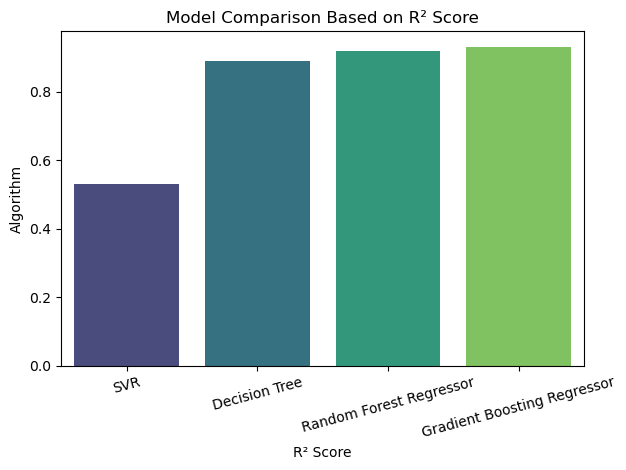

In [156]:
sns.barplot(data=plot, x='Algorithm', y=' R2 Score', palette='viridis')
plt.title('Model Comparison Based on R² Score')
plt.xlabel('R² Score')
plt.ylabel('Algorithm')
plt.xticks(rotation=15)  # Optional: sets scale from 0 to 1 for better visual comparison
plt.tight_layout()
plt.show()

# Challenges faced : 
## Data Transformation:
- ### Route information required parsing and distribution into separate columns.
- ### Conversion of duration data into a standardized unit (minutes) was necessary.
- ### The 'Additional_info' column necessitated an appropriate encoding scheme.
- ### The arrival time, which included monthly information, required precise separation and parsing.
## Time Constraints:
- ### The entire data preprocessing phase consumed a significant amount of time, estimated at 2-3 units (e.g., hours or days).
## Exploratory Data Analysis (EDA):
- ### Identifying the most effective visualization techniques for gaining insights from the processed data presented a challenge.
## Model Development:
- ### The selection of appropriate algorithms for the given problem required careful consideration.
- ### Optimal parameter tuning for the chosen algorithms proved to be a critical and challenging step.